In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/UP-STAT/CRDC2013_14_LEA.csv', encoding='cp1252')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dataset.head()

,LEA_STATE,LEAID,LEA_NAME,LEA_ADDRESS,LEA_CITY,LEA_ZIP,LEA_JJ_IND,LEA_ENR,LEA_SCHOOLS,LEA_CRCOORD_SEX_IND,...,LEA_GEDCRED_WH_F,LEA_GEDCRED_TR_M,LEA_GEDCRED_TR_F,TOT_GEDCRED_M,TOT_GEDCRED_F,LEA_GEDCRED_LEP_M,LEA_GEDCRED_LEP_F,LEA_GEDCRED_IDEA_M,LEA_GEDCRED_IDEA_F,DSO_LEA_GED_IND
0,AL,0100002,ALABAMA YOUTH SERVICES,1000 INDUSTRIAL SCHOOL ROAD,MT. MEIGS,36057,YES,3674,3,YES,...,0,0,0,16,0,0,0,0,0,0
1,AL,0100005,ALBERTVILLE CITY,107 WEST MAIN STREET,ALBERTVILLE,35950,NO,4712,6,YES,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,0
2,AL,0100006,MARSHALL COUNTY,12380 US HIGHWAY 431 S,GUNTERSVILLE,35976,NO,5624,14,YES,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,0
3,AL,0100007,HOOVER CITY,2810 METROPOLITAN WAY,HOOVER,35243,NO,14054,16,YES,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,0
4,AL,0100008,MADISON CITY,211 CELTIC DRIVE,MADISON,35758,YES,9206,11,YES,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,0


In [27]:
## Take LEA_NAME and LEA_ENR features from the dataset

df = dataset[['LEA_NAME', 'LEA_ENR']]

new_df = df.groupby(by = ['LEA_NAME'])['LEA_ENR'].sum()
new_df = new_df.reset_index()
new_df = new_df.sort_values(by = "LEA_ENR", ascending=False)

In [29]:
new_df = new_df.iloc[1:10,:]
new_df

,LEA_NAME,LEA_ENR
10016,NEW YORK CITY PUBLIC SCHOOLS,1032167
8286,LOS ANGELES UNIFIED,603599
2769,CITY OF CHICAGO SD 299,407219
3517,DADE,356192
2803,CLARK COUNTY SCHOOL DISTRICT,320510
1779,BROWARD,262664
6627,HOUSTON ISD,211553
6436,HILLSBOROUGH,203294
10749,ORANGE,187477


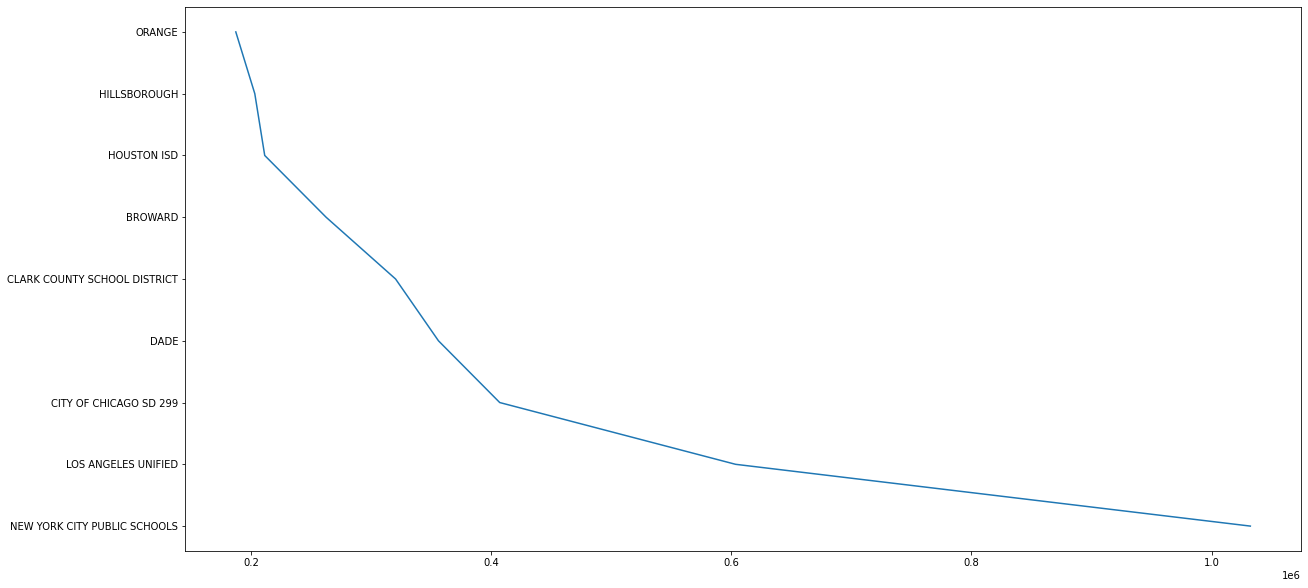

In [31]:
## Graph which shows No of students in specific district  

fig = plt.figure(figsize=(20,10))
plt.plot(new_df['LEA_ENR'],new_df['LEA_NAME'])
plt.show()

In [44]:
## count the number of student participated in GED based on races

df = dataset[['LEA_NAME', 'LEA_GEDPART_HI_M', 'LEA_GEDPART_HI_F', 'LEA_GEDPART_AM_M','LEA_GEDPART_AM_F', 
              'LEA_GEDPART_AS_M', 'LEA_GEDPART_AS_F', 'LEA_GEDPART_HP_M', 'LEA_GEDPART_HP_F', 'LEA_GEDPART_BL_M', 'LEA_GEDPART_BL_F',
              'LEA_GEDPART_WH_M','LEA_GEDPART_WH_F','LEA_GEDPART_TR_M', 'LEA_GEDPART_TR_F']]

## We have negative values in the dataset so we convert them into positive values as number of participants never be negative.
df = df.iloc[:,1:].apply(abs)

males = [sum(df['LEA_GEDPART_HI_M']), sum(df['LEA_GEDPART_AM_M']), sum(df['LEA_GEDPART_AS_M']), sum(df['LEA_GEDPART_HP_M']),
         sum(df['LEA_GEDPART_BL_M']), sum(df['LEA_GEDPART_WH_M']), sum(df['LEA_GEDPART_TR_M'])]

females = [sum(df['LEA_GEDPART_HI_F']), sum(df['LEA_GEDPART_AM_F']), sum(df['LEA_GEDPART_AS_F']), sum(df['LEA_GEDPART_HP_F']),
         sum(df['LEA_GEDPART_BL_F']), sum(df['LEA_GEDPART_WH_F']), sum(df['LEA_GEDPART_TR_F'])]

race = ['Hispanic', 'American Indian/Alaska Native', 'Asian', 'Native Hawaiian/Pacific Islander', 'Black', 'White', 'Other']



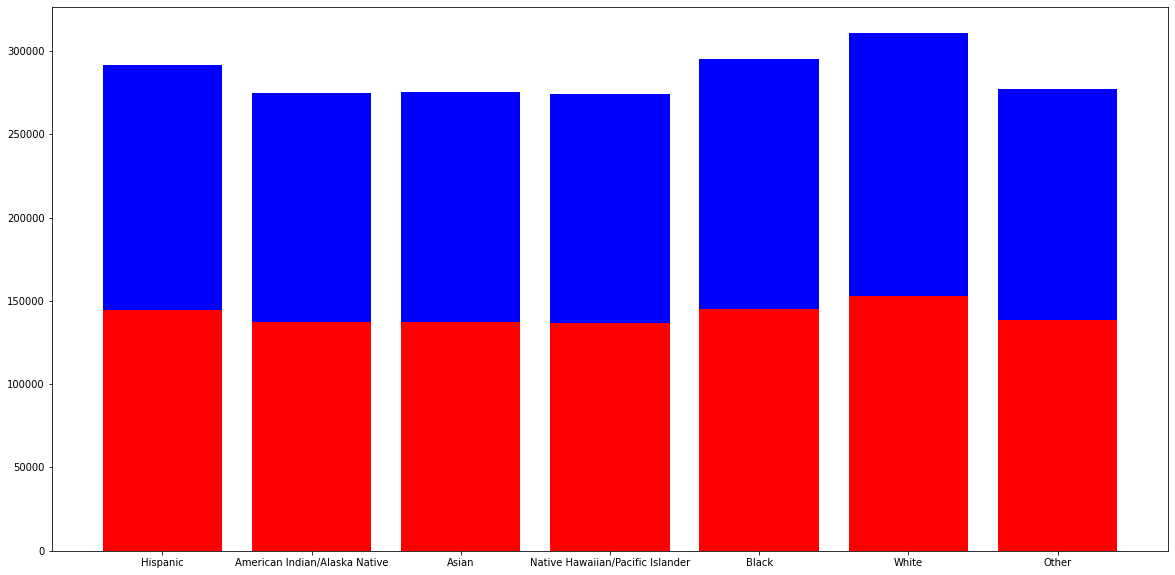

In [47]:

fig = plt.figure(figsize=(20, 10))
plt.bar(race, males, color='r')
plt.bar(race, males, bottom=females, color='b')
plt.show()

In [51]:
## Students receiving a high school equivalency credential based on race

df = dataset[['LEA_NAME', 'LEA_GEDCRED_HI_M', 'LEA_GEDCRED_HI_F', 'LEA_GEDCRED_AM_M', 'LEA_GEDCRED_AM_F', 'LEA_GEDCRED_AS_M',
              'LEA_GEDCRED_AS_F', 'LEA_GEDCRED_HP_M', 'LEA_GEDCRED_HP_F', 'LEA_GEDCRED_BL_M', 'LEA_GEDCRED_BL_F', 'LEA_GEDCRED_WH_M',
              'LEA_GEDCRED_WH_F', 'LEA_GEDCRED_TR_M', 'LEA_GEDCRED_TR_F']]

## We have negative values in the dataset so we convert them into positive values as number of participants never be negative.
df = df.iloc[:,1:].apply(abs)


males = [sum(df['LEA_GEDCRED_HI_M']), sum(df['LEA_GEDCRED_AM_M']), sum(df['LEA_GEDCRED_AS_M']), sum(df['LEA_GEDCRED_HP_M']),
         sum(df['LEA_GEDCRED_BL_M']), sum(df['LEA_GEDCRED_WH_M']), sum(df['LEA_GEDCRED_TR_M'])]

females = [sum(df['LEA_GEDCRED_HI_F']), sum(df['LEA_GEDCRED_AM_F']), sum(df['LEA_GEDCRED_AS_F']), sum(df['LEA_GEDCRED_HP_F']),
         sum(df['LEA_GEDCRED_BL_F']), sum(df['LEA_GEDCRED_WH_F']), sum(df['LEA_GEDCRED_TR_F'])]

race = ['Hispanic', 'American Indian/Alaska Native', 'Asian', 'Native Hawaiian/Pacific Islander', 'Black', 'White', 'Other']


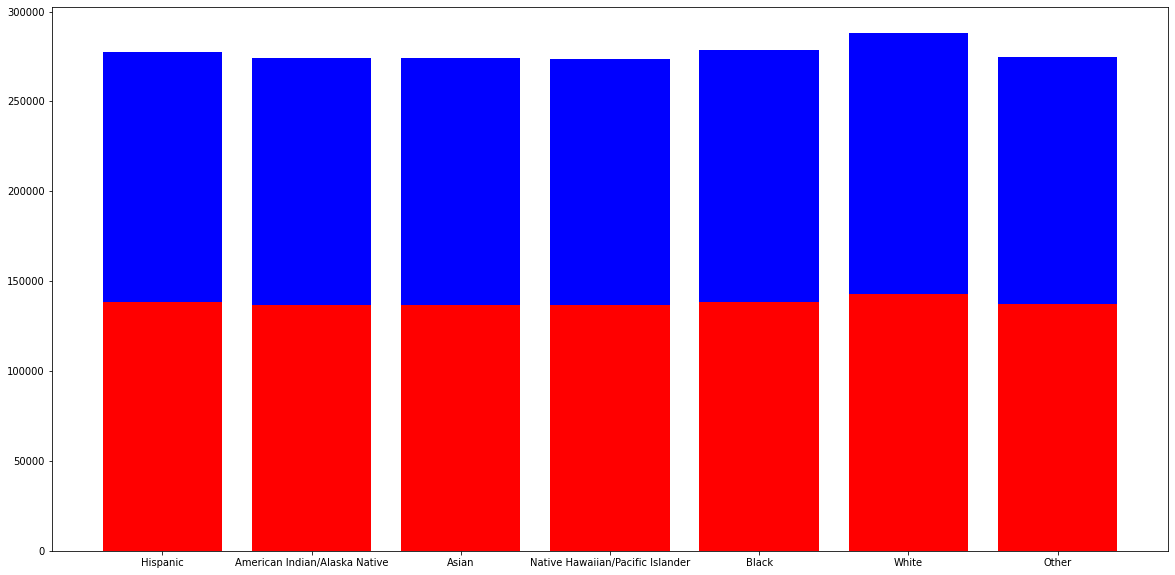

In [52]:

fig = plt.figure(figsize=(20, 10))
plt.bar(race, males, color='r')
plt.bar(race, males, bottom=females, color='b')
plt.show()

In [54]:
## get the details of total number of participants and number of GED credentials earned. 

df = dataset[['LEA_NAME', 'TOT_GEDPART_M', 'TOT_GEDPART_F', 'TOT_GEDCRED_M','TOT_GEDCRED_F']]

## We have negative values in the dataset so we convert them into positive values as number of participants never be negative.
df = df.iloc[:,1:].apply(abs)

males = [sum(df['TOT_GEDPART_M']), sum(df['TOT_GEDCRED_M'])]
females = [sum(df['TOT_GEDPART_F']), sum(df['TOT_GEDCRED_F'])]

label = ['Students who participates in GED', 'Students who earned GED credentials']

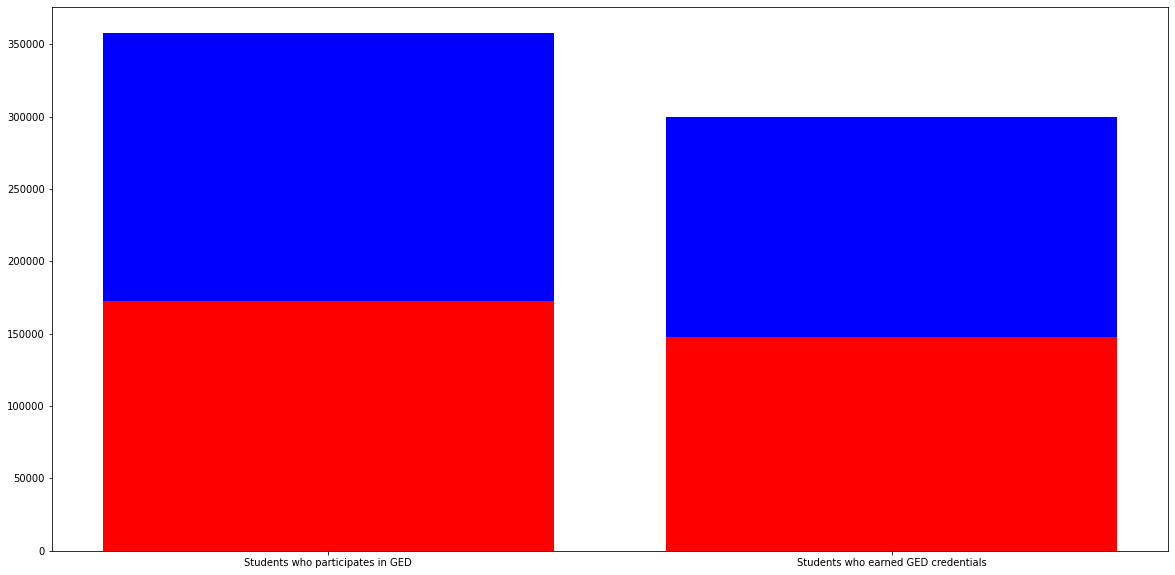

In [55]:

fig = plt.figure(figsize=(20, 10))
plt.bar(label, males, color='r')
plt.bar(label, males, bottom=females, color='b')
plt.show()

In [56]:
## Explore other dataset 

dataset = pd.read_csv('/content/drive/MyDrive/UP-STAT/CRDC2013_14_SCH.csv', encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,9,26,27,28,33,34,533,1926) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [57]:
dataset.head()

,LEA_STATE,LEA_NAME,SCH_NAME,COMBOKEY,LEAID,SCHID,JJ,CCD_LATCOD,CCD_LONCOD,NCES_SCHOOL_ID,...,SCH_FTE_TEACH_WOFED,SCH_SAL_TEACH_WOFED,SCH_NPE_WOFED,DSO_SCH_FTE_TEACH_WOFED,DSO_SCH_NPE_WOFED,DSO_SCH_SAL_INSTR_WOFED,DSO_SCH_SAL_TEACH_WOFED,SCH_JJTYPE,SCH_JJSYDAYS,SCH_JJHOURS
0,AL,ALABAMA YOUTH SERVICES,WALLACE SCH - MT MEIGS CAMPUS,10000201705,100002,1705,YES,32.3748,-86.0824,10000201705.0,...,29.00,65000.00,139000.0,0,0,0,0,POST,220,35
1,AL,ALABAMA YOUTH SERVICES,MCNEEL SCH - VACCA CAMPUS,10000201706,100002,1706,YES,33.5867,-86.7106,10000201706.0,...,21.00,473000.00,134000.0,0,0,0,0,POST,220,35
2,AL,ALA YOUTH SER,AUTAUGA CAMPUS,10000299995,100002,99995,YES,NaN,NaN,NaN,...,0.00,-9.00,102.0,0,0,0,0,POST,220,35
3,AL,ALBERTVILLE CITY,ALA AVENUE MIDDLE SCH,10000500870,100005,870,NO,34.2602,-86.2062,10000500870.0,...,28.64,1441033.00,160221.0,0,0,0,0,-9,-9,-9
4,AL,ALBERTVILLE CITY,ALBERTVILLE HIGH SCH,10000500871,100005,871,NO,34.2622,-86.2049,10000500871.0,...,57.64,3018949.56,1011572.0,0,0,0,0,-9,-9,-9


In [58]:
## Students preschool enrollment based on race

df = dataset[['LEA_NAME', 'SCH_PSENR_HI_M', 'SCH_PSENR_HI_F', 'SCH_PSENR_AM_M', 'SCH_PSENR_AM_F', 'SCH_PSENR_AS_M',
              'SCH_PSENR_AS_F', 'SCH_PSENR_HP_M', 'SCH_PSENR_HP_F', 'SCH_PSENR_BL_M', 'SCH_PSENR_BL_F', 'SCH_PSENR_WH_M',
              'SCH_PSENR_WH_F', 'SCH_PSENR_TR_M', 'SCH_PSENR_TR_F']]

## We have negative values in the dataset so we convert them into positive values as number of participants never be negative.
df = df.iloc[:,1:].apply(abs)


males = [sum(df['SCH_PSENR_HI_M']), sum(df['SCH_PSENR_AM_M']), sum(df['SCH_PSENR_AS_M']), sum(df['SCH_PSENR_HP_M']),
         sum(df['SCH_PSENR_BL_M']), sum(df['SCH_PSENR_WH_M']), sum(df['SCH_PSENR_TR_M'])]

females = [sum(df['SCH_PSENR_HI_F']), sum(df['SCH_PSENR_AM_F']), sum(df['SCH_PSENR_AS_F']), sum(df['SCH_PSENR_HP_F']),
         sum(df['SCH_PSENR_BL_F']), sum(df['SCH_PSENR_WH_F']), sum(df['SCH_PSENR_TR_F'])]

race = ['Hispanic', 'American Indian/Alaska Native', 'Asian', 'Native Hawaiian/Pacific Islander', 'Black', 'White', 'Other']


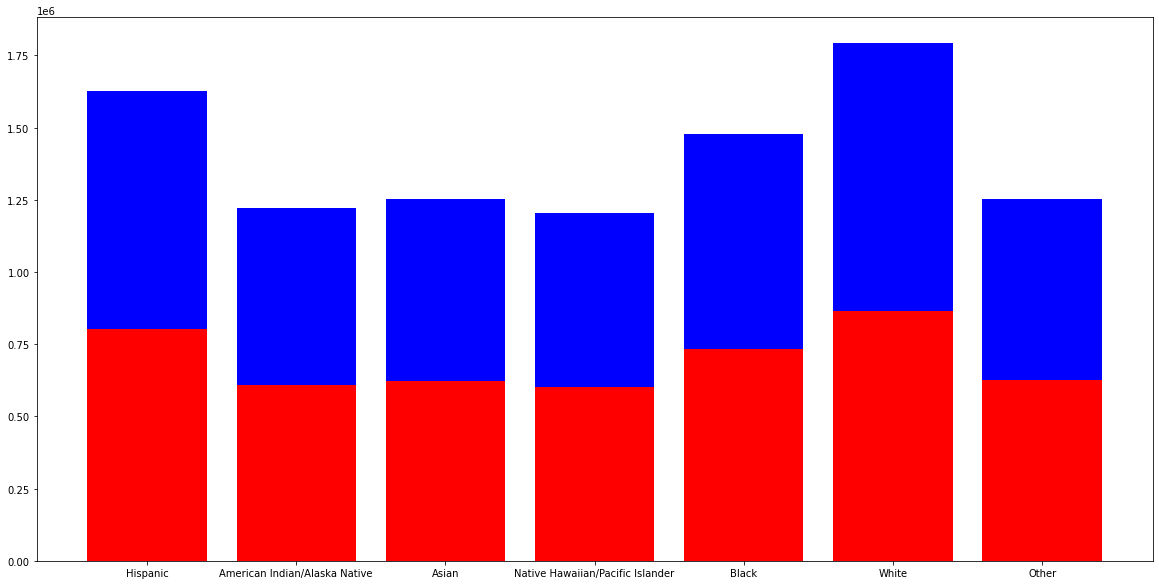

In [59]:

fig = plt.figure(figsize=(20, 10))
plt.bar(race, males, color='r')
plt.bar(race, males, bottom=females, color='b')
plt.show()

In [60]:
## Overall Students enrollment based on race

df = dataset[['LEA_NAME', 'SCH_ENR_HI_M', 'SCH_ENR_HI_F', 'SCH_ENR_AM_M', 'SCH_ENR_AM_F', 'SCH_ENR_AS_M',
              'SCH_ENR_AS_F', 'SCH_ENR_HP_M', 'SCH_ENR_HP_F', 'SCH_ENR_BL_M', 'SCH_ENR_BL_F', 'SCH_ENR_WH_M',
              'SCH_ENR_WH_F', 'SCH_ENR_TR_M', 'SCH_ENR_TR_F']]

## We have negative values in the dataset so we convert them into positive values as number of participants never be negative.
df = df.iloc[:,1:].apply(abs)


males = [sum(df['SCH_ENR_HI_M']), sum(df['SCH_ENR_AM_M']), sum(df['SCH_ENR_AS_M']), sum(df['SCH_ENR_HP_M']),
         sum(df['SCH_ENR_BL_M']), sum(df['SCH_ENR_WH_M']), sum(df['SCH_ENR_TR_M'])]

females = [sum(df['SCH_ENR_HI_F']), sum(df['SCH_ENR_AM_F']), sum(df['SCH_ENR_AS_F']), sum(df['SCH_ENR_HP_F']),
         sum(df['SCH_ENR_BL_F']), sum(df['SCH_ENR_WH_F']), sum(df['SCH_ENR_TR_F'])]

race = ['Hispanic', 'American Indian/Alaska Native', 'Asian', 'Native Hawaiian/Pacific Islander', 'Black', 'White', 'Other']


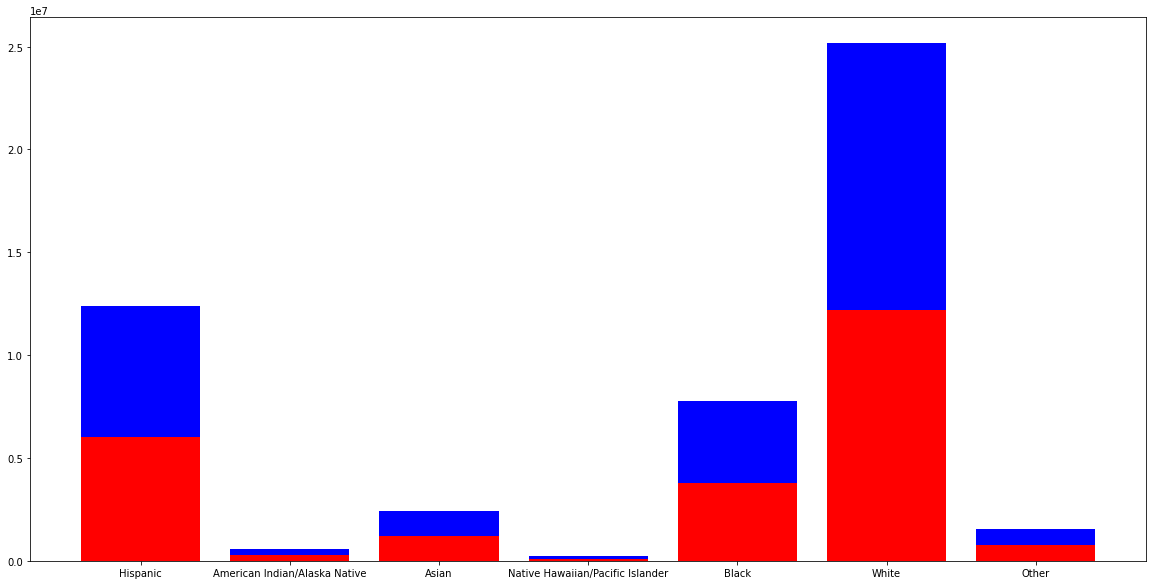

In [61]:

fig = plt.figure(figsize=(20, 10))
plt.bar(race, males, color='r')
plt.bar(race, males, bottom=females, color='b')
plt.show()

In [62]:
## Enrollment of Students who are Limited English Proficient 


df = dataset[['LEA_NAME', 'SCH_LEPENR_HI_M', 'SCH_LEPENR_HI_F', 'SCH_LEPENR_AM_M', 'SCH_LEPENR_AM_F', 'SCH_LEPENR_AS_M',
              'SCH_LEPENR_AS_F', 'SCH_LEPENR_HP_M', 'SCH_LEPENR_HP_F', 'SCH_LEPENR_BL_M', 'SCH_LEPENR_BL_F', 'SCH_LEPENR_WH_M',
              'SCH_LEPENR_WH_F', 'SCH_LEPENR_TR_M', 'SCH_LEPENR_TR_F']]

## We have negative values in the dataset so we convert them into positive values as number of participants never be negative.
df = df.iloc[:,1:].apply(abs)


males = [sum(df['SCH_LEPENR_HI_M']), sum(df['SCH_LEPENR_AM_M']), sum(df['SCH_LEPENR_AS_M']), sum(df['SCH_LEPENR_HP_M']),
         sum(df['SCH_LEPENR_BL_M']), sum(df['SCH_LEPENR_WH_M']), sum(df['SCH_LEPENR_TR_M'])]

females = [sum(df['SCH_LEPENR_HI_F']), sum(df['SCH_LEPENR_AM_F']), sum(df['SCH_LEPENR_AS_F']), sum(df['SCH_LEPENR_HP_F']),
         sum(df['SCH_LEPENR_BL_F']), sum(df['SCH_LEPENR_WH_F']), sum(df['SCH_LEPENR_TR_F'])]

race = ['Hispanic', 'American Indian/Alaska Native', 'Asian', 'Native Hawaiian/Pacific Islander', 'Black', 'White', 'Other']


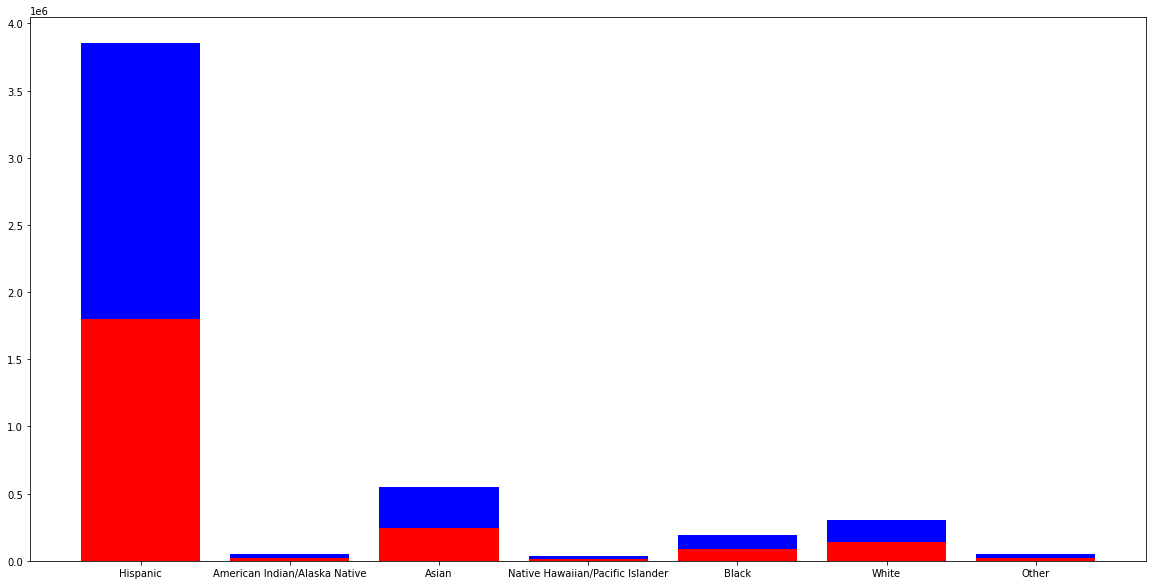

In [63]:

fig = plt.figure(figsize=(20, 10))
plt.bar(race, males, color='r')
plt.bar(race, males, bottom=females, color='b')
plt.show()

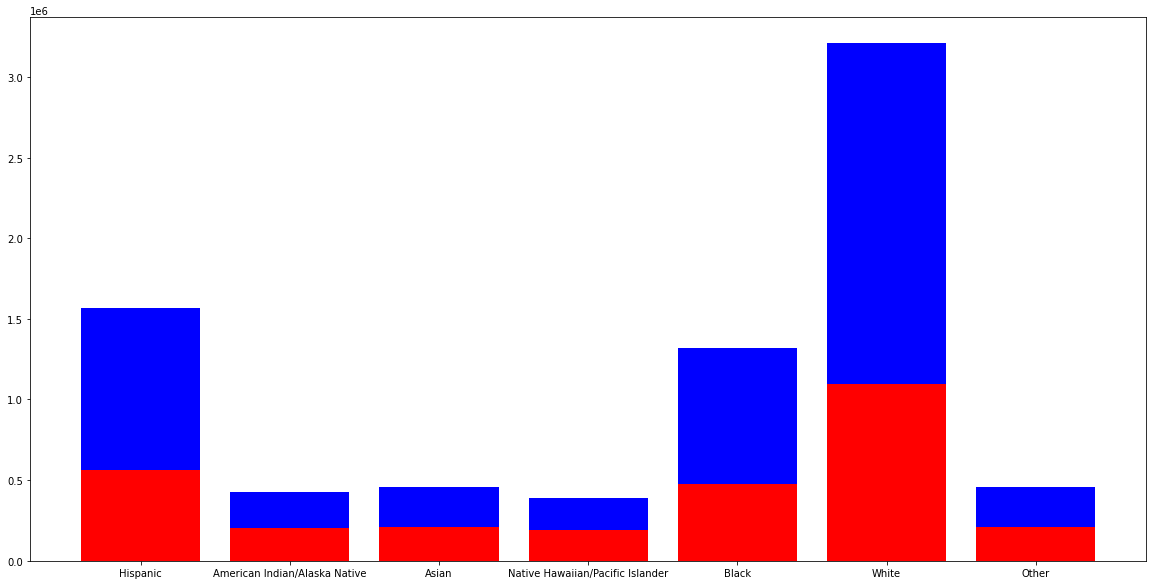

In [64]:
## Students with disabilities served under IDEA

df = dataset[['LEA_NAME', 'SCH_IDEAENR_HI_M', 'SCH_IDEAENR_HI_F', 'SCH_IDEAENR_AM_M', 'SCH_IDEAENR_AM_F', 'SCH_IDEAENR_AS_M',
              'SCH_IDEAENR_AS_F', 'SCH_IDEAENR_HP_M', 'SCH_IDEAENR_HP_F', 'SCH_IDEAENR_BL_M', 'SCH_IDEAENR_BL_F', 'SCH_IDEAENR_WH_M',
              'SCH_IDEAENR_WH_F', 'SCH_IDEAENR_TR_M', 'SCH_IDEAENR_TR_F']]

## We have negative values in the dataset so we convert them into positive values as number of participants never be negative.
df = df.iloc[:,1:].apply(abs)


males = [sum(df['SCH_IDEAENR_HI_M']), sum(df['SCH_IDEAENR_AM_M']), sum(df['SCH_IDEAENR_AS_M']), sum(df['SCH_IDEAENR_HP_M']),
         sum(df['SCH_IDEAENR_BL_M']), sum(df['SCH_IDEAENR_WH_M']), sum(df['SCH_IDEAENR_TR_M'])]

females = [sum(df['SCH_IDEAENR_HI_F']), sum(df['SCH_IDEAENR_AM_F']), sum(df['SCH_IDEAENR_AS_F']), sum(df['SCH_IDEAENR_HP_F']),
         sum(df['SCH_IDEAENR_BL_F']), sum(df['SCH_IDEAENR_WH_F']), sum(df['SCH_IDEAENR_TR_F'])]

race = ['Hispanic', 'American Indian/Alaska Native', 'Asian', 'Native Hawaiian/Pacific Islander', 'Black', 'White', 'Other']



fig = plt.figure(figsize=(20, 10))
plt.bar(race, males, color='r')
plt.bar(race, males, bottom=females, color='b')
plt.show()